In [239]:
from random import seed
from random import randint
import numpy as np
import matplotlib.pyplot as plt


In [240]:
def randomValues(nObjects):
    
    seed(1)
    sizeObjects=[randint(1,10*nObjects) for i in range(1,nObjects + 1)]
    seed(3)
    profits=[10*randint(1,nObjects) for i in range(1, nObjects + 1)]
    return profits,sizeObjects


In [246]:
def knapsackFun(temperaturaInicial,alfa, levelTemp, levelTime, timeEnd, nObjects,knapsack):
    
    vectorTemperatures=[]
    vectorBestProfits=[]
    
    #Parámetros para N=10 % ganancia=393; %sol='0110111110'; 
    #Soluciones óptimas de GLPK 
    sizeObjects = [23,3, 13, 25, 24, 21, 4, 16, 18, 15]
    # Tamaños de los objetos 
    profits = [18, 29, 55, 39, 47, 91, 35, 50, 86, 16]
    #profits,sizeObjects = randomValues(nObjects)
    #print(f"Profits desde la knapsack fun {profits}")
    #print(f"sizeObjects desde la knapsack fun {sizeObjects}")
    
    seedObjetiveFun = np.zeros(nObjects)
    objetiveFun = np.sum(seedObjetiveFun * profits)
    bestSolution  = seedObjetiveFun
    solActual= seedObjetiveFun
    
    
    while temperaturaInicial > timeEnd:
        for i in range(levelTemp):
            neighbourState = solActual
            neighbours = neighbourState
            position = randint(0, nObjects - 1)
            neighbours[position] = (neighbourState[position] + 1) % 2
            #print(f"i {i}")
            
            # Si el vector de vecinos supera el peso de la mochila este ejecuta un ciclo while hasta
            # que encuentra un peso adecuado para iterar
            
            while(sum(neighbours * sizeObjects) > knapsack):
                neighbours = neighbourState
                position = randint(0, nObjects - 1)
                neighbours[position] = (neighbourState[position] + 1) % 2 
                
                
            #Apenas encuentra un peso adecuado para el vector de vecinos, este vector pasa a ser
            #el nuevo estado de vecinos 
            neighbourState = neighbours
            #Se usa una funcion objetivo auxiliar para determinar la ganancia momentanea
            
            auxFunObj = sum(neighbourState * profits)
            
            #Si las ganancias superan a la funcion objetivo actual
            #Se ha encontrado una solucion con mejor ganancia que la anterior
            if(auxFunObj > objetiveFun):
                solActual = neighbourState
                #bestSolution = solActual
                objetiveFun = auxFunObj
                #print(sum(bestSolution*profits))
                vectorBestProfits.append(sum(bestSolution*profits))

               
            else:
                exp = np.exp( - (objetiveFun - auxFunObj)/temperaturaInicial)
                r = np.random.rand(1)
                if(r[0]<exp):
                    solActual =  neighbourState
                    objetiveFun = auxFunObj
                    
                    
            if(auxFunObj>objetiveFun):
                bestSolution = solActual
                objetiveFun = auxFunObj

            
        temperaturaInicial=temperaturaInicial*alfa
        vectorTemperatures.append(temperaturaInicial)
        
    return objetiveFun,bestSolution,vectorTemperatures,vectorBestProfits




Objetive Function 393.0
bestSolution [1. 1. 0. 0. 1. 1. 0. 0. 0. 1.]
bestSolution 400.0


C:\Users\cristiam loaiza\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


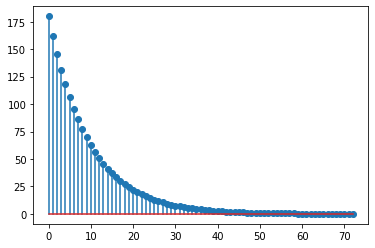

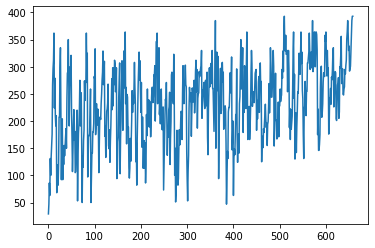

In [248]:
temperaturaInicial = 200
alfa = 0.9 # como va bajando t
levelTemp = 100
levelTime = 0.9
timeEnd = 0.1

nObjects = 10
knapsack = 100

#profits,sizeObjects = randomValues(nObjects)

#print(f"profits random: {profits}")
#print(f"sizeObjects:    {sizeObjects}")

objetiveFun,bestSolution,vectorTemperature, vectorProfits=knapsackFun(temperaturaInicial,alfa,levelTemp,
                                                                      levelTime, timeEnd,nObjects,knapsack)

print(f"Objetive Function {objetiveFun}")
print(f"bestSolution {bestSolution}")
print(f"bestSolution {sum(bestSolution*profits)}")
plt.figure()
plt.stem(vectorTemperature)
plt.show()
plt.figure()
plt.plot(vectorProfits)